In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os

from utils import *
from model import *

%matplotlib inline

Using TensorFlow backend.


## Explanatory Analysis

In [5]:
# Load the Train/Test Data
mapdata = np.loadtxt("../input/mapdata_copyright_openstreetmap_contributors.txt")
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
weather = pd.read_csv("../input/weather.csv")
traps = train[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent']]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]

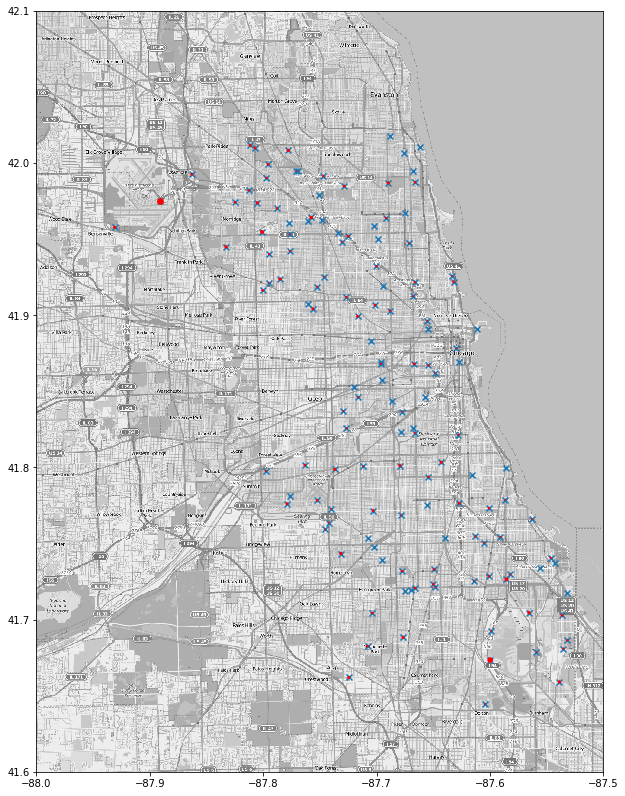

In [3]:
# Location of Traps
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,14))
plt.imshow(mapdata,
           cmap=plt.get_cmap('gray'),
           extent=lon_lat_box,
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')


wnvPresent = train.groupby(['Latitude','Longitude']).agg(np.sum)['WnvPresent'].reset_index().values
plt.scatter(wnvPresent[:,1], wnvPresent[:,0], marker='o',color='r',s=wnvPresent[:,2]/2)


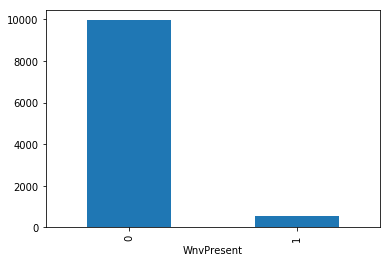

In [4]:
train.groupby('WnvPresent').size().plot(kind='bar')

In [5]:
train.iloc[0]

Date                                                             2007-05-29
Address                   4100 North Oak Park Avenue, Chicago, IL 60634,...
Species                                              CULEX PIPIENS/RESTUANS
Block                                                                    41
Street                                                       N OAK PARK AVE
Trap                                                                   T002
AddressNumberAndStreet                    4100  N OAK PARK AVE, Chicago, IL
Latitude                                                            41.9547
Longitude                                                           -87.801
AddressAccuracy                                                           9
NumMosquitos                                                              1
WnvPresent                                                                0
Name: 0, dtype: object

In [6]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [7]:
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [8]:
test.groupby('Species').size()

Species
CULEX ERRATICUS           14345
CULEX PIPIENS             14521
CULEX PIPIENS/RESTUANS    15359
CULEX RESTUANS            14670
CULEX SALINARIUS          14355
CULEX TARSALIS            14347
CULEX TERRITANS           14351
UNSPECIFIED CULEX         14345
dtype: int64

In [9]:
# Spray Data
spray = pd.read_csv("../input/spray.csv")
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [10]:
# Spray data is not available for test years!! 
spray.groupby('Date').size()

Date
2011-08-29      95
2011-09-07    2114
2013-07-17    2202
2013-07-25    1607
2013-08-08    1195
2013-08-15    2668
2013-08-16     141
2013-08-22    1587
2013-08-29    2302
2013-09-05     924
dtype: int64

In [6]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


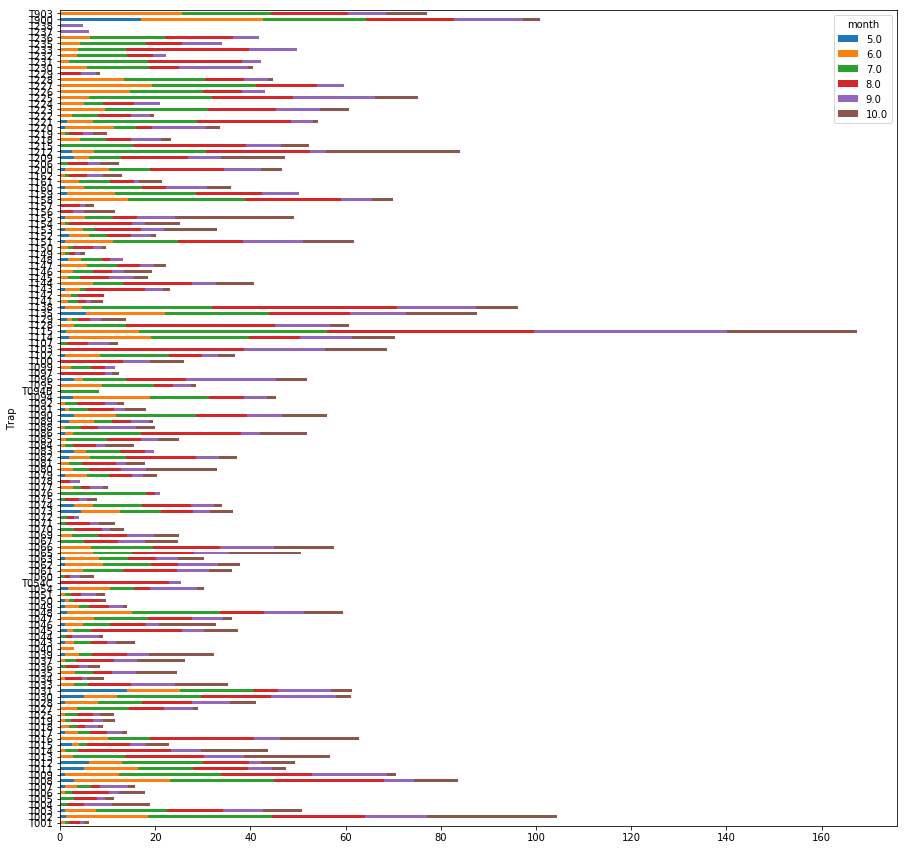

In [12]:
# Mosquito Count by Trap and Month
def _get_trap_stats(dt):
    get_month = lambda d: float(d.split('-')[1])
    dt['month'] = dt['Date'].apply(get_month)
    trap_stats = dt.groupby(['Trap','month']).agg([np.mean,len])['NumMosquitos'].reset_index().sort_values('mean',ascending=False)
    trap_stats.index = trap_stats.Trap
    trap_stats.index = trap_stats[['Trap','month']]
    trap_stats = trap_stats.drop(['len'],axis=1)
    return trap_stats.pivot(index='Trap',columns='month',values='mean').fillna(0)

trap_stats = _get_trap_stats(train)
trap_stats.plot.barh(stacked=True,figsize=(15,15))

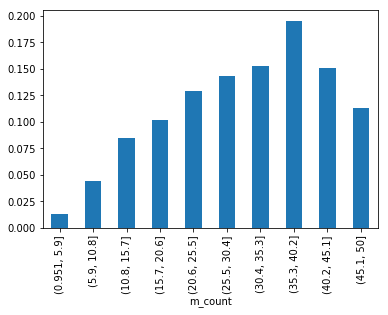

In [13]:
# Infection probability given number of mosquitoes in the trap
_temp = train.copy()[['NumMosquitos','WnvPresent']]
_temp['m_count'] = pd.cut(_temp.NumMosquitos,10)
_temp = _temp.groupby('m_count').mean()['WnvPresent']
_temp.plot(kind='bar')

In [14]:
train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'month'],
      dtype='object')

In [15]:
def _fit_neighborhood_model(dt):
    get_month = lambda d: int(d.split('-')[1])
    dt['month'] = dt['Date'].apply(get_month)
    months = set(dt.month.astype(int).tolist())
    neighborhood_model = {}
    for _month in months:
        neigh = KNeighborsRegressor(n_neighbors=3)
        _data = dt[['Longitude','Latitude','NumMosquitos','month']][dt['month'] == _month]
        _data = _data.groupby(['Longitude','Latitude']).mean()['NumMosquitos'].reset_index()
        _X, _y = np.array(_data[['Longitude','Latitude']]), _data['NumMosquitos']
        neigh.fit(_X, _y)
        neighborhood_model[_month] = neigh
    return neighborhood_model

neigh = _fit_neighborhood_model(train)
i = 2001
train.iloc[i], neigh[8].predict(np.array([train.Longitude[i],train.Latitude[i]]).reshape(1,-1))[0]

(Date                                                           2007-08-15
 Address                   5000 South Union Avenue, Chicago, IL 60609, USA
 Species                                            CULEX PIPIENS/RESTUANS
 Block                                                                  50
 Street                                                        S UNION AVE
 Trap                                                                 T082
 AddressNumberAndStreet                     5000  S UNION AVE, Chicago, IL
 Latitude                                                          41.8034
 Longitude                                                         -87.643
 AddressAccuracy                                                         8
 NumMosquitos                                                           30
 WnvPresent                                                              0
 month                                                                   8
 Name: 2001, dtype: objec

In [16]:
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,month
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,5


In [17]:
# Fitted model versus actual mosquito count
_temp = train.copy()
def _get_mosquito_bias(dt, model):
    get_month = lambda d: int(d.split('-')[1])
    dt['month'] = dt['Date'].apply(get_month)
    # Compute the approx mosquito count
    def compute_bias(row):
        _x = np.array([row.Longitude,row.Latitude]).reshape(1,-1)
        return model[row.month].predict(_x)[0]
    return dt.apply(compute_bias,axis=1)
get_month = lambda d: int(d.split('-')[1])
_temp['month'] = _temp['Date'].apply(get_month)
_temp['app'] =  _get_mosquito_bias(train, neigh)
_temp[['Trap','month','app','NumMosquitos']].tail(20)

,Trap,month,app,NumMosquitos
10486,T900,9,10.901082,16
10487,T900,9,10.901082,9
10488,T900,9,10.901082,11
10489,T900,9,10.901082,1
10490,T222,9,3.783960,1
10491,T223,9,12.766178,11
10492,T223,9,12.766178,1
10493,T225,9,9.884615,3
10494,T227,9,8.562745,7
10495,T227,9,8.562745,1


In [20]:
_lon_min, _lon_max, _lat_min, _lat_max = train['Longitude'].min(), train['Longitude'].max(), train['Latitude'].min(), train['Latitude'].max()
lons = np.linspace(_lon_min,_lon_max,20)
lats = np.linspace(_lat_min,_lat_max,20)
_out = []
for _lon, _lat in product(lons, lats):
    _out.append({
        'val': neigh[8].predict(np.array([_lon,_lat]).reshape(1,-1))[0],
        'lon' : _lon,
        'lat' : _lat
    }
    ) 
_out = pd.DataFrame(_out)
_out.head()

,lat,lon,val
0,41.644612,-87.930995,5.329861
1,41.664234,-87.930995,5.329861
2,41.683856,-87.930995,5.329861
3,41.703478,-87.930995,5.329861
4,41.723100,-87.930995,5.329861


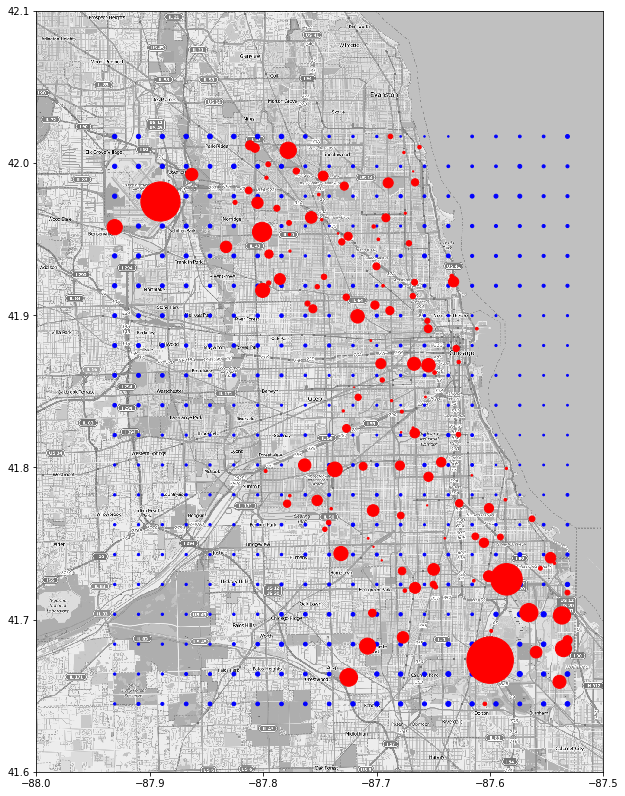

In [21]:
# Location of Traps
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(20,14))
plt.imshow(mapdata,
           cmap=plt.get_cmap('gray'),
           extent=lon_lat_box,
           aspect=aspect)

neighbor_app = _out.groupby(['lat','lon']).agg(np.sum)['val'].reset_index().values
plt.scatter(neighbor_app[:,1], neighbor_app[:,0], marker='o',color='b',s=neighbor_app[:,2])

num_m = train.groupby(['Latitude','Longitude']).agg(np.sum)['NumMosquitos'].reset_index().values
plt.scatter(num_m[:,1], num_m[:,0], marker='o',color='r',s=num_m[:,2]/10)

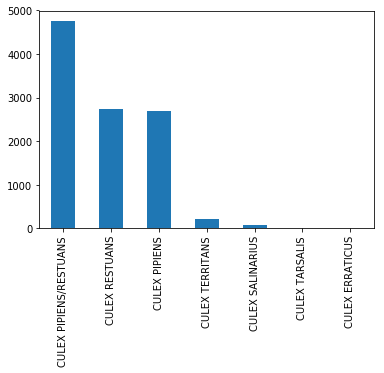

In [22]:
# Species counts
train['Species'].value_counts().plot(kind='bar')

In [ ]:
#################################################

In [23]:
# Processed weather data
weather = process_weather_data()
weather.head()

,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,StnPressure,PrecipTotal,ResultSpeed,AvgPrecip,Diff,week,month
0,2007-05-01,83.5,51.0,67.5,51.0,56.5,29.140,0.0,2.20,0.0,13.773270,20,5.0
1,2007-05-02,59.5,42.5,51.5,42.0,47.0,29.410,0.0,13.15,0.0,13.773270,20,5.0
2,2007-05-03,66.5,47.0,57.0,40.0,49.0,29.425,0.0,12.30,0.0,13.800000,20,5.0
3,2007-05-04,72.0,50.0,58.0,41.5,50.0,29.335,0.0,10.25,0.0,13.886635,21,5.0
4,2007-05-05,66.0,53.5,60.0,38.5,49.5,29.430,0.0,11.45,0.0,13.773270,21,5.0


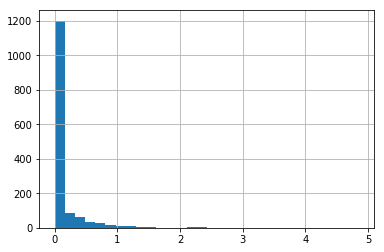

In [24]:
# Show precipitation histogram
weather.PrecipTotal.hist(bins=30)

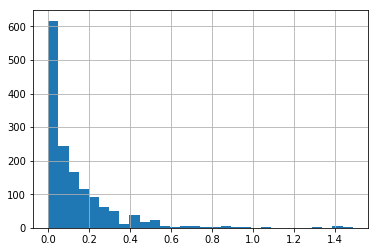

In [25]:
r = weather.PrecipTotal.rolling(window=5)
weather['AvgPrecip'] = r.mean().fillna(0)
weather.AvgPrecip.hist(bins=30)

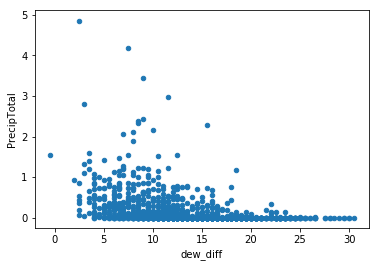

In [26]:
# Show the correlation between dew point - average temp difference and precipation total
weather['dew_diff'] = weather['Tavg'] - weather['DewPoint']
weather.plot(kind='scatter',x='dew_diff',y='PrecipTotal')

In [27]:
# Weather data averaged over months
montly_avgs = weather.groupby('month').mean().drop(['week'],axis=1)
montly_avgs.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,StnPressure,PrecipTotal,ResultSpeed,AvgPrecip,Diff,dew_diff
month,,,,,,,,,,,
5.0,71.497984,51.288306,61.590726,46.312500,53.572581,29.271331,0.139677,8.008468,0.137258,15.213089,15.278226
6.0,80.514583,61.560417,71.295833,56.927083,62.708333,29.225018,0.157354,7.086042,0.159371,14.331250,14.368750
7.0,84.514113,66.322581,75.685484,60.796371,66.391129,29.279194,0.137137,6.288105,0.142540,14.935751,14.889113
8.0,82.717742,65.375000,74.306452,61.030242,66.002016,29.289272,0.149738,5.782863,0.152383,13.214784,13.276210
9.0,75.020833,56.935417,66.177083,53.475000,58.872917,29.344833,0.105667,6.595417,0.105083,12.767471,12.702083


### Processed Training Data

In [3]:
train = get_train_or_test_data()
train.head()

Processing weather data...
Processing training data...


,Species,Latitude,Longitude,WnvPresent,MosquitoBias,Tmax,Tmin,Tavg,DewPoint,WetBulb,StnPressure,PrecipTotal,ResultSpeed,AvgPrecip,Diff,week,month
0,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,0,1.611111,88.0,62.5,75.5,58.5,65.5,29.415,0.0,5.8,0.02,17.3,24,5.0
1,CULEX RESTUANS,41.954690,-87.800991,0,1.611111,88.0,62.5,75.5,58.5,65.5,29.415,0.0,5.8,0.02,17.3,24,5.0
2,CULEX RESTUANS,41.994991,-87.769279,0,3.333333,88.0,62.5,75.5,58.5,65.5,29.415,0.0,5.8,0.02,17.3,24,5.0
3,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,0,2.944444,88.0,62.5,75.5,58.5,65.5,29.415,0.0,5.8,0.02,17.3,24,5.0
4,CULEX RESTUANS,41.974089,-87.824812,0,2.944444,88.0,62.5,75.5,58.5,65.5,29.415,0.0,5.8,0.02,17.3,24,5.0


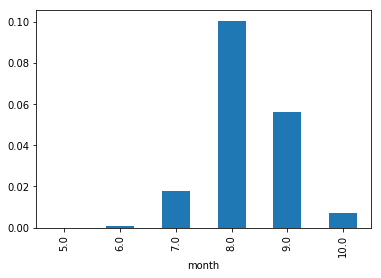

In [4]:
# Target variable distribution by month
train.groupby('month').mean()['WnvPresent'].plot(kind='bar')

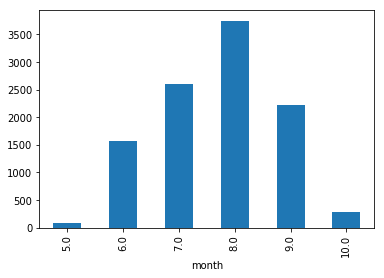

In [5]:
# Data Points by Month
train.groupby('month').size().plot(kind='bar')

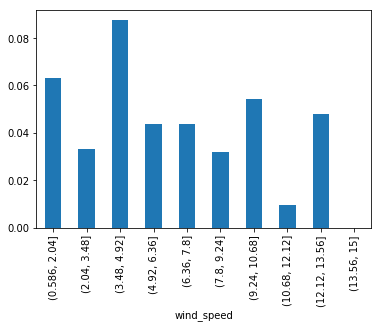

In [6]:
# Wind speed
#train['ResultSpeed'].hist()
_temp = train.copy()[['ResultSpeed','WnvPresent']]
_temp['wind_speed'] = pd.cut(_temp.ResultSpeed,10)
_temp = _temp.groupby('wind_speed').mean()['WnvPresent']
_temp.plot(kind='bar')

WnvPresent                
                 mean       std   len
has_rained                           
False        0.047453  0.212622  6301
True         0.059929  0.237383  4205

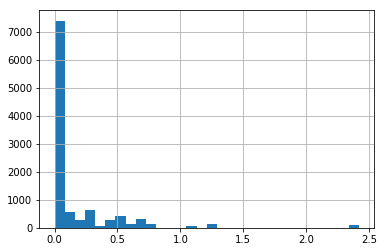

In [7]:
# Precipation
_temp = train.copy()[['PrecipTotal','WnvPresent']]
_temp['PrecipTotal'].hist(bins=30)
_temp['has_rained'] = (_temp['PrecipTotal'] > 0)
_temp = _temp.drop('PrecipTotal',axis=1)
_temp.groupby('has_rained').agg([np.mean,np.std,len])

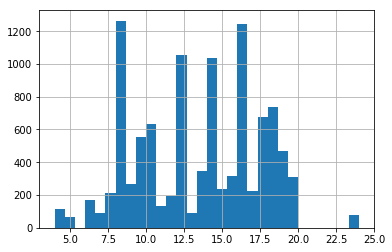

In [8]:
_temp = train.copy()[['Tavg','DewPoint','WetBulb','WnvPresent']]
_temp['diff'] = _temp['Tavg'] - _temp['DewPoint']
_temp['diff'].hist(bins=30)
_temp['diff'] = pd.cut(_temp['diff'],10)
_temp = _temp.groupby('diff').mean()['WnvPresent']

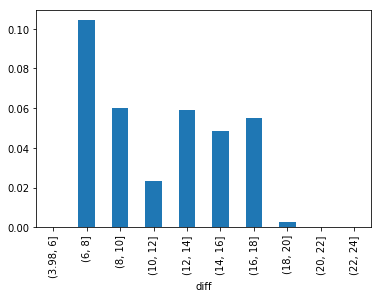

In [9]:
# Saturation - Detection 
_temp.plot(kind='bar')

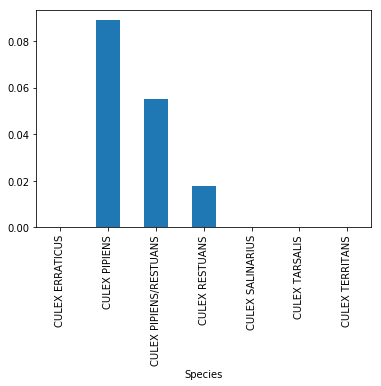

In [10]:
_temp = train.copy()[['Species','WnvPresent']]
_temp = _temp.groupby('Species').mean()['WnvPresent']
_temp.plot(kind='bar')

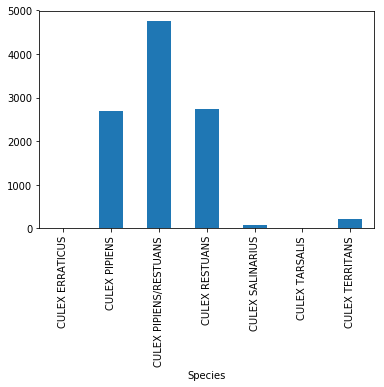

In [11]:
train.groupby('Species').size().plot(kind='bar')

In [12]:
# Preprocessing
species = pd.get_dummies(train['Species'])
species.head()

,CULEX ERRATICUS,CULEX PIPIENS,CULEX PIPIENS/RESTUANS,CULEX RESTUANS,CULEX SALINARIUS,CULEX TARSALIS,CULEX TERRITANS
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0


## Pipeline

In [2]:
# Prepare data
train_data = get_train_or_test_data()
X, Y, scaler = preprocess_data(train_data)

# Fit
fitted_model = train_model(X, Y)

# Predict
test_data = get_train_or_test_data(train=False)
X_test, _, _ = preprocess_data(test_data, train=False, scaler=scaler)

preds = fitted_model.predict_proba(X_test, verbose=0)
save_predictions(preds)

Processing weather data...
Processing training data...
training data features ['Latitude', 'Longitude', 'MosquitoBias', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'StnPressure', 'PrecipTotal', 'ResultSpeed', 'SeaLevel', 'AvgPrecip', 'Diff', 'week', '06', '07', '08', '09', '10', 'CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX SALINARIUS', 'CULEX TARSALIS', 'CULEX TERRITANS', 'UNSPECIFIED CULEX']
Building the model...
Training model with 5 folds...
ROC: 0.802188393255
ROC: 0.782835793892
ROC: 0.867207644471
ROC: 0.839122635356
ROC: 0.752001604429
***
Average ROC: 0.808671214281
Saving model...
Processing weather data...
Processing test data...
test data features ['Latitude', 'Longitude', 'MosquitoBias', 'Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'StnPressure', 'PrecipTotal', 'ResultSpeed', 'SeaLevel', 'AvgPrecip', 'Diff', 'week', '06', '07', '08', '09', '10', 'CULEX ERRATICUS', 'CULEX PIPIENS', 'CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CU

In [3]:
fitted_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 32)            928         dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 32)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 32)            0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 32)            1056        dropout_1[0][0]                  
___________________________________________________________________________________________